In [1]:
import numpy as np
import pandas as pd

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from sklearn.metrics import mean_squared_error

import seaborn as sns

In [2]:
def tsplot_acf_pacf(x, 
                    y = None,
                    z = None, 
                    a = None, 
                    b = None, 
                    lags=None, 
                    layout = (2,2), 
                    title='', 
                    figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    if layout == (2, 2):
        ts_ax   = plt.subplot2grid(layout, (0, 0))
        hist_ax = plt.subplot2grid(layout, (0, 1))
        acf_ax  = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        x.plot(ax=ts_ax)
        ts_ax.set_title(title)
        x.plot(ax=hist_ax, kind='hist', bins=25)
        hist_ax.set_title('Histogram')
        smt.graphics.plot_acf(x, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(x, lags=lags, ax=pacf_ax)
        [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
        sns.despine()
        plt.tight_layout()
        return ts_ax, acf_ax, pacf_ax
        
    elif layout == (3,3):
        AR_ax   = plt.subplot2grid(layout, (0, 0))
        AR_acf_ax  = plt.subplot2grid(layout, (1, 0))   
        AR_pacf_ax = plt.subplot2grid(layout, (2, 0))
        MA_ax = plt.subplot2grid(layout, (0, 1))
        MA_acf_ax = plt.subplot2grid(layout, (1, 1))
        MA_pacf_ax = plt.subplot2grid(layout, (2, 1))
        ARMA_ax = plt.subplot2grid(layout, (0, 2))
        ARMA_acf_ax = plt.subplot2grid(layout, (1, 2))
        ARMA_pacf_ax = plt.subplot2grid(layout, (2, 2))
        x.plot(ax=AR_ax)
        AR_ax.set_title('AR')
        y.plot(ax=MA_ax)
        MA_ax.set_title('MA')
        z.plot(ax=ARMA_ax)
        ARMA_ax.set_title('ARMA')
        smt.graphics.plot_acf(x, lags=lags, ax=AR_acf_ax)
        smt.graphics.plot_pacf(x, lags=lags, ax=AR_pacf_ax)
        smt.graphics.plot_acf(y, lags=lags, ax=MA_acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=MA_pacf_ax)
        smt.graphics.plot_acf(z, lags=lags, ax=ARMA_acf_ax)
        smt.graphics.plot_pacf(z, lags=lags, ax=ARMA_pacf_ax)
        sns.despine()
        plt.tight_layout()
        
    elif layout == (5,2):
        AR1_acf_ax   = plt.subplot2grid(layout, (0, 0))
        AR1_pacf_ax   = plt.subplot2grid(layout, (0, 1))
        AR2_acf_ax = plt.subplot2grid(layout, (1, 0))
        AR2_pacf_ax = plt.subplot2grid(layout, (1, 1))
        AR3_acf_ax  = plt.subplot2grid(layout, (2, 0))
        AR3_pacf_ax  = plt.subplot2grid(layout, (2, 1))
        AR4_acf_ax = plt.subplot2grid(layout, (3, 0))
        AR4_pacf_ax = plt.subplot2grid(layout, (3, 1))
        AR5_acf_ax = plt.subplot2grid(layout, (4, 0))
        AR5_pacf_ax = plt.subplot2grid(layout, (4, 1))
#        x.plot(ax=AR1_acf_ax)
#        y.plot(ax=AR2_acf_ax)
#        z.plot(ax=AR3_acf_ax)
#        a.plot(ax=AR4_acf_ax)
#        b.plot(ax=AR5_acf_ax)
        smt.graphics.plot_acf(x, lags=lags, ax=AR1_acf_ax)
        smt.graphics.plot_pacf(x, lags=lags, ax=AR1_pacf_ax)
        smt.graphics.plot_acf(y, lags=lags, ax=AR2_acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=AR2_pacf_ax)
        smt.graphics.plot_acf(z, lags=lags, ax=AR3_acf_ax)
        smt.graphics.plot_pacf(z, lags=lags, ax=AR3_pacf_ax)
        smt.graphics.plot_acf(a, lags=lags, ax=AR4_acf_ax)
        smt.graphics.plot_pacf(a, lags=lags, ax=AR4_pacf_ax)
        smt.graphics.plot_acf(b, lags=lags, ax=AR5_acf_ax)
        smt.graphics.plot_pacf(b, lags=lags, ax=AR5_pacf_ax)
        sns.despine()
        plt.tight_layout()
        
        
    elif layout == (3,2):
        AR1_acf_ax   = plt.subplot2grid(layout, (0, 0))
        AR1_pacf_ax   = plt.subplot2grid(layout, (0, 1))
        AR2_acf_ax = plt.subplot2grid(layout, (1, 0))
        AR2_pacf_ax = plt.subplot2grid(layout, (1, 1))
        AR3_acf_ax  = plt.subplot2grid(layout, (2, 0))
        AR3_pacf_ax  = plt.subplot2grid(layout, (2, 1))
        smt.graphics.plot_acf(x, lags=lags, ax=AR1_acf_ax)
        smt.graphics.plot_pacf(x, lags=lags, ax=AR1_pacf_ax)
        smt.graphics.plot_acf(y, lags=lags, ax=AR2_acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=AR2_pacf_ax)
        smt.graphics.plot_acf(z, lags=lags, ax=AR3_acf_ax)
        smt.graphics.plot_pacf(z, lags=lags, ax=AR3_pacf_ax)
        sns.despine()
        plt.tight_layout()

In [3]:
def generate_ARMA_data(order_p, 
                       order_q, 
                       nsample = 1000):
    ar = np.array(order_p)
    ma = np.array(order_q)
    data = ArmaProcess(ar,ma)
    print('Is the process stationary? {}'.format(data.isstationary))
    sample = data.generate_sample(nsample = nsample)
    sample_series = pd.Series(sample)
    return sample_series

==================================================================================================================

# Time Series Models

## AutoRegressive AR(p) Model

* Main idea: Predict future based on its past
* Let $\epsilon_1,\epsilon_2,...$ be WN$(0,\sigma_\epsilon^2).$
* $\{X_t\}_t$ is an AR$(p)$ process if 
$$X_t - \mu = \phi_1(X_{t-1} - \mu) + \phi_2(X_{t-2} - \mu) + ... + \phi_p(X_{t-p} - \mu)   + \epsilon_t$$
for all $t$ where $\mu$ is the mean of the processs.

* Simple algebra leads to 
$$X_t = \beta_0 + \phi_1X_{t-1} + \phi_2 X_{t-2}+ ... + \phi_p X_{t-p}  + \epsilon_t$$
where $\beta_0 = (1 - \phi_1 - \phi_2 - \phi_3 - ... - \phi_p)\mu.$ 

* **Unit root test**: If 
$$\phi(L) = 1- \phi_1 L - \phi_2 L^2 - \phi_3 L^3 - ... - \phi_p L^p$$ 
has a root whose magnitude is larger than $1,$ then $\{X_t\}_t$ is not stationary.

* If $p=1,$ then 

$$X_t = \mu + \phi_1(X_{t-1} - \mu) + \epsilon_t .$$ 

Therefore,

|  Conditions      |          $X_t$         |
|---------------|:--------------------:|
| $\phi_1 = 0$     |    white noise         |
| $\phi_1 < 0$     | mean reversion |
| $\phi_1 > 0$ |    momentum         |
| $\phi_1 = 1$ |    random walk         |
| $|\phi_1| > 1$ |    'explode'         |

* The following plots illustrate table above when $p=1$ and $\mu = 0.$

In [4]:
# AR(1) paramter = 0
AR1_series = generate_ARMA_data( [1,0],[1] )

# AR(1) paramter = -0.6
AR2_series = generate_ARMA_data( [1,0.6],[1])

# AR(1) paramter = 0.4
AR3_series = generate_ARMA_data( [1,-0.4],[1])

# AR(1) paramter = 1
AR4_series = generate_ARMA_data( [1,-1],[1])

# AR(1) paramter = 10
AR5_series = generate_ARMA_data( [1,-10],[1])

Is the process stationary? True
Is the process stationary? True
Is the process stationary? True
Is the process stationary? False
Is the process stationary? False


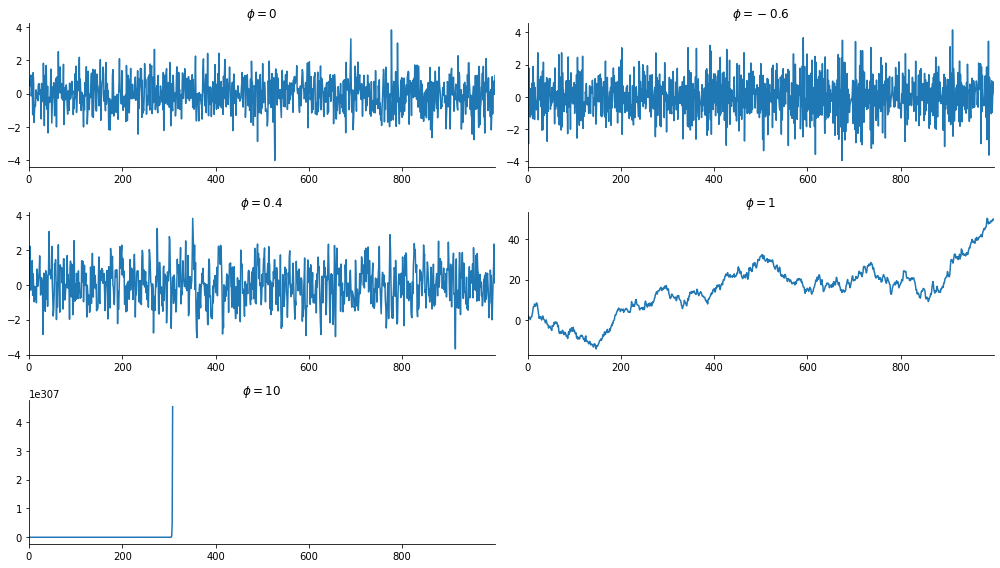

In [5]:
fig = plt.figure(figsize=(14,8))
layout = (3,2)
AR1_ax   = plt.subplot2grid(layout, (0, 0))
AR2_ax = plt.subplot2grid(layout, (0, 1))
AR3_ax  = plt.subplot2grid(layout, (1, 0))
AR4_ax = plt.subplot2grid(layout, (1, 1))
AR5_ax = plt.subplot2grid(layout, (2, 0))

AR1_series.plot(ax = AR1_ax)
AR1_ax.set_title('$\phi = 0$')
AR2_series.plot(ax = AR2_ax)
AR2_ax.set_title('$\phi = -0.6$')
AR3_series.plot(ax = AR3_ax)
AR3_ax.set_title('$\phi = 0.4$')
AR4_series.plot(ax = AR4_ax)
AR4_ax.set_title('$\phi = 1$')
AR5_series.plot(ax = AR5_ax)
AR5_ax.set_title('$\phi = 10$')

sns.despine()
plt.tight_layout()

* $AR(1)$ is weakly stationary if and only if $|\phi|<1.$

* If $AR(1)$ is weakly stationary, then one can derive the following formulas.

|  $\phi_{hh} = 0, h\geq 2$  |     $\phi_{11} = \rho(1)$        |     $\gamma(0) = \frac{\sigma_\epsilon^2}{1 - \phi^2}$   |
|------------------------------------|:--------------------:|:-------------------------------------------------------------------:|
| $\gamma(h) = \phi^{|h|} \frac{\sigma_\epsilon^2}{1 - \phi^2} $  |  $\rho(h) = \phi^{|h|}$     |   $E(X_t) = \mu$      | 

* ACF and PACF of an $AR(1)$ has only limited range of shapes

* If the sample ACF of the data does not behave in one of these ways, then an $AR(1)$ model is not suitable.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1338: RuntimeWarning: invalid value encountered in subtract
  X -= X.mean()                  # automatically demean's X


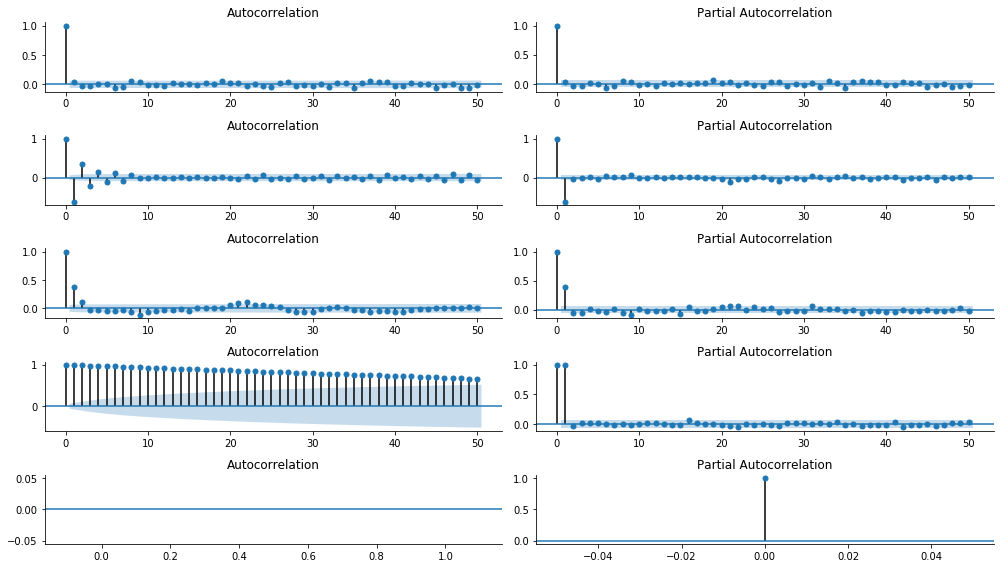

In [6]:
tsplot_acf_pacf(AR1_series, AR2_series, AR3_series, AR4_series, AR5_series, lags = 50, layout = (5,2))

* One can use the **Yule-Walker equation** to compute $\phi_{hh}$ by solving system of linear equations 

$$P_k \phi_k = \rho_{(k)}$$ 
where 

$$\begin{pmatrix}
1 & \rho(1) & ... & \rho(k-1) \\
\rho(1) & 1 & ... & \rho(k-2) \\
\vdots & \vdots &  \ddots & \vdots \\
\rho(k-1) & \rho(k-2) & ... & 1
\end{pmatrix}, \quad \phi_k = 
\begin{pmatrix}
\phi_{k1} \\
\phi_{k2} \\
\vdots \\
\phi_{kk}
\end{pmatrix} \quad\text{and}\quad \rho_{(k)} =  \begin{pmatrix}
\rho(1) \\
\rho(2) \\
\vdots \\
\rho(k)
\end{pmatrix}.$$

* One can solve equations above using Cramer's rule: 
$$\phi_{kk} = \frac{det(P_k^*)}{det(P_k)}$$
where $P_k^*$ is $P_k$ with $k$th column replaced with $\rho_{(k)}.$

* Note that Yule-Walker equation is only applicable for AR model.

* Identification of an AR model is best done with the PACF, which is illustrated below.

In [7]:
ma = [1]
ar2 = [1, 0.1, -0.5]
ar3 = [1, 0.5, -0.2, -0.7]
ar4 = [1, 0.5, 0.2, -0.7, 0.3]

AR_2 = generate_ARMA_data(ar2, ma)
AR_3 = generate_ARMA_data(ar3, ma)
AR_4 = generate_ARMA_data(ar4, ma)

Is the process stationary? True
Is the process stationary? True
Is the process stationary? False


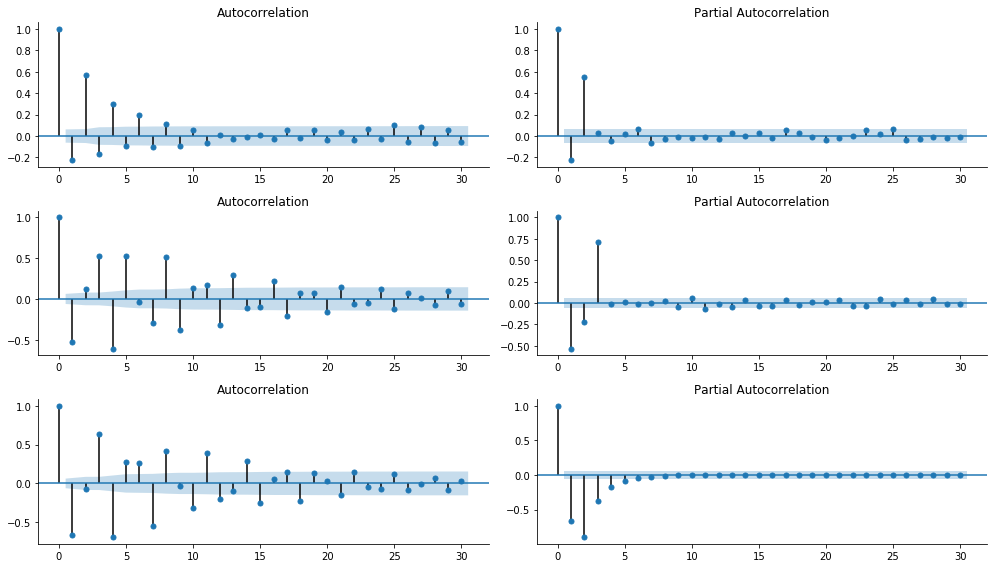

In [8]:
tsplot_acf_pacf(x = AR_2, y = AR_3, z = AR_4, layout = (3,2))

$\textbf{Lag Operator}$ $L$ is defined as 

$$LX_t = X_{t-1}.$$

* $AR(p)$ model satisfies 

$$\phi(L) X_t = \beta_0 + \epsilon_t$$ 

where $\phi(L) = 1- \phi_1 L - \phi_2 L^2 - \phi_3 L^3 - ... - \phi_p L^p$ and $\beta_0 = (1 - \phi_1 - \phi_2 - \phi_3 - ... - \phi_p)\mu.$

==================================================================================================================

## Moving Average MA$(q)$ Model

* $MA(q)$ process follows 

$$X_t - \mu = \epsilon_t + \theta_1 \epsilon_1 + \theta_2 \epsilon_2 + ... + \theta_q \epsilon_q.$$

* $\rho(h) = 0$ for all $|h| > q$ and $\rho(h) \neq 0$ for all $|h| \leq q.$

* $MA(q)$ model is always weakly stationary and satisfies 

$$\gamma(h) = \sigma_\epsilon^2( \theta_1\theta_{1-h} + \theta_2 \theta_{2-h} + ... + \theta_q \theta_{q-h} ). $$

* If $\theta(L) = 1 + \theta_1 L + \theta_2 L^2 + \theta_3 L^3 + ... + \theta_q L^q$, then 

$$\begin{align*}
X_t & = \mu + \theta(L) \epsilon_t \\
\Rightarrow \epsilon_t & = \theta(L)^{-1}( X_t - \mu )
\end{align*}$$

* Identification of an MA model is best done with ACF rather than PACF.

* When $p=1,$  

|  $\theta_1$      |         $X_t$         | 
|---------------|:--------------------:|
| $\theta_1<0$ | one-period Mean Reversion |
| $\theta_1>0$ | one-period Momentum |
| $\theta_1=0$ | white noise |

In [9]:
# MA(1) paramter = 0
MA1_series = generate_ARMA_data( [1],[1,0] )

# MA(1) paramter = -0.6
MA2_series = generate_ARMA_data( [1],[1, -0.6])

# MA(1) paramter = 0.4
MA3_series = generate_ARMA_data( [1],[1, 0.4])

# MA(1) paramter = 1
MA4_series = generate_ARMA_data( [1],[1,1])

# MA(1) paramter = 10
MA5_series = generate_ARMA_data( [1],[1,10])

Is the process stationary? True
Is the process stationary? True
Is the process stationary? True
Is the process stationary? True
Is the process stationary? True


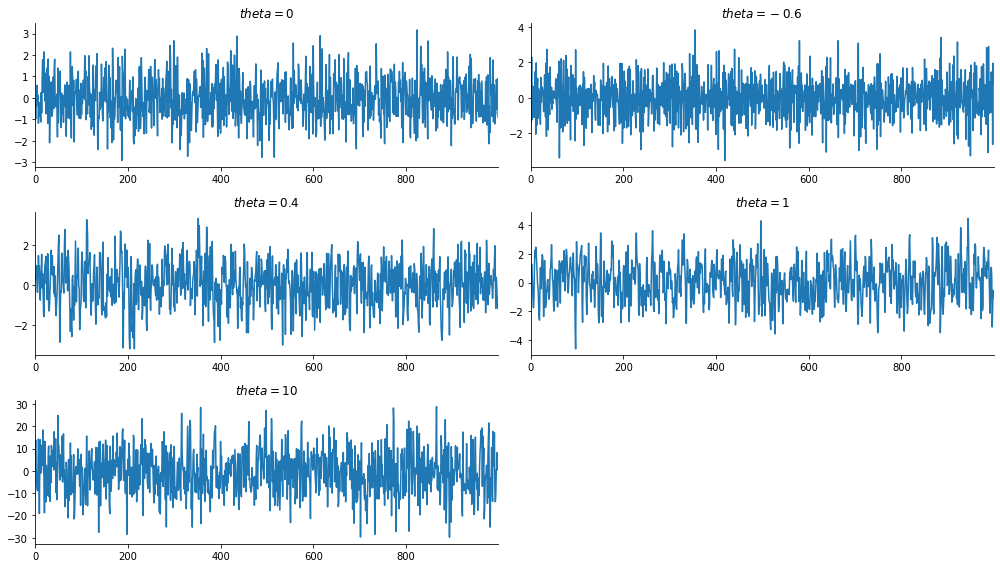

In [10]:
fig = plt.figure(figsize=(14,8))
layout = (3,2)
MA1_ax   = plt.subplot2grid(layout, (0, 0))
MA2_ax = plt.subplot2grid(layout, (0, 1))
MA3_ax  = plt.subplot2grid(layout, (1, 0))
MA4_ax = plt.subplot2grid(layout, (1, 1))
MA5_ax = plt.subplot2grid(layout, (2, 0))

MA1_series.plot(ax = MA1_ax)
MA1_ax.set_title('$theta = 0$')
MA2_series.plot(ax = MA2_ax)
MA2_ax.set_title('$theta = -0.6$')
MA3_series.plot(ax = MA3_ax)
MA3_ax.set_title('$theta = 0.4$')
MA4_series.plot(ax = MA4_ax)
MA4_ax.set_title('$theta = 1$')
MA5_series.plot(ax = MA5_ax)
MA5_ax.set_title('$theta = 10$')

sns.despine()
plt.tight_layout()

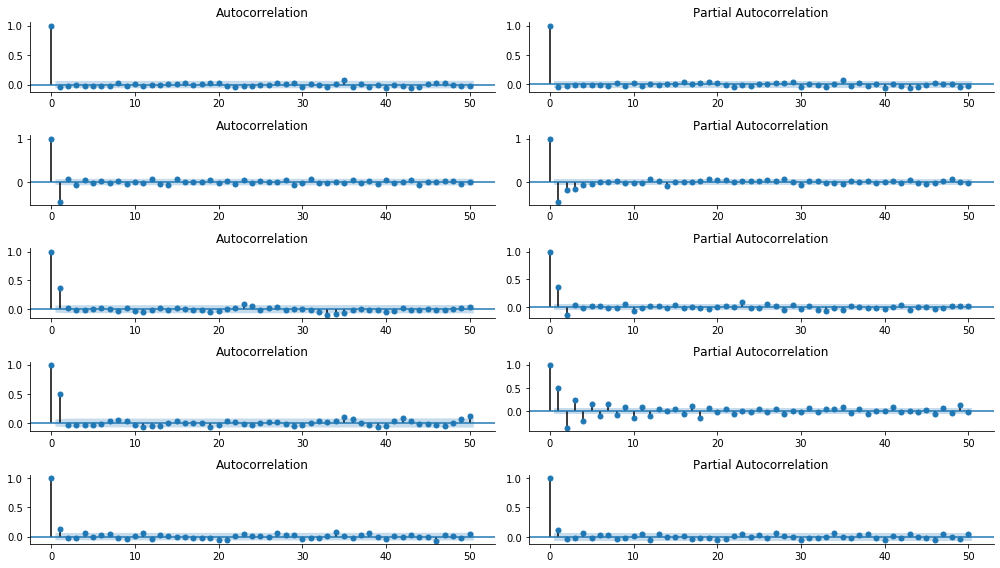

In [11]:
tsplot_acf_pacf(MA1_series, MA2_series, MA3_series, MA4_series, MA5_series, lags = 50, layout = (5,2))

* Identification of an MA model is best done with the ACF.

In [12]:
ar = [1]
ma2 = [1, 0.1, -0.5]
ma3 = [1, 0.5, -0.2, -0.7]
ma4 = [1, 0.5, 0.7, -0.7, 0.3]

MA_2 = generate_ARMA_data(ar, ma2)
MA_3 = generate_ARMA_data(ar, ma3)
MA_4 = generate_ARMA_data(ar, ma4)

Is the process stationary? True
Is the process stationary? True
Is the process stationary? True


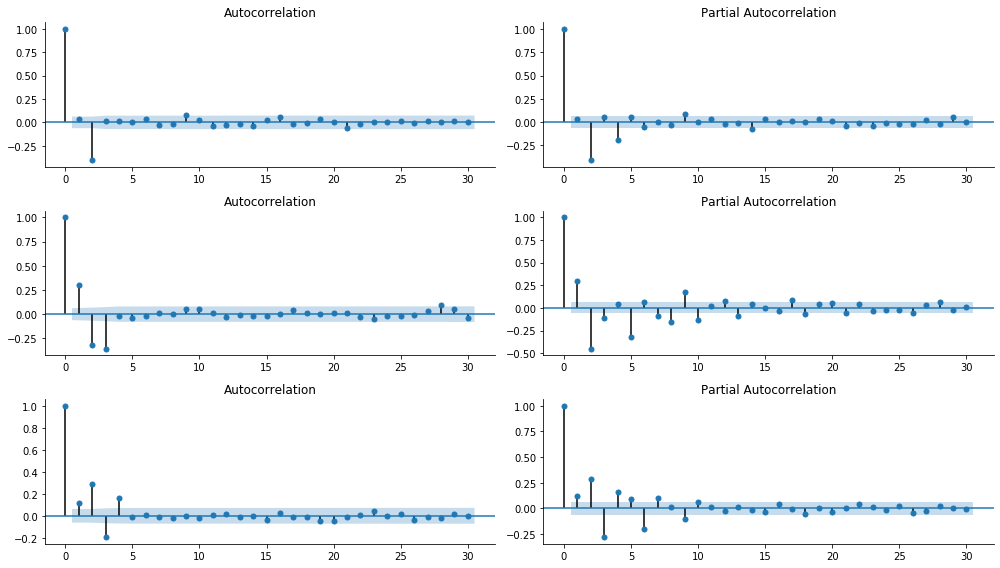

In [13]:
tsplot_acf_pacf(x = MA_2, y = MA_3, z = MA_4, layout = (3,2))

==================================================================================================================

## AutoRegressive Moving Average ARMA(p,q) Model

* $ARMA(p,q) = AR(p) + MA(q)$

* $ARMA(p,q)$ model satisfies 

$$X_t - \mu = \phi_1(X_{t-1} - \mu) + \phi_2(X_{t-2} - \mu) + ... + \phi_p(X_{t-p} - \mu) + \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}$$

* **Assumption**: Stationary time series (If violated, use ARIMA).

* Using lag operator, $ARMA(p,q)$ satisfies
$$\phi(L) X_t = c + \theta(L) \epsilon_t \quad \text{fo some constant }c.$$

Is the process stationary? True
Is the process stationary? True
Is the process stationary? True


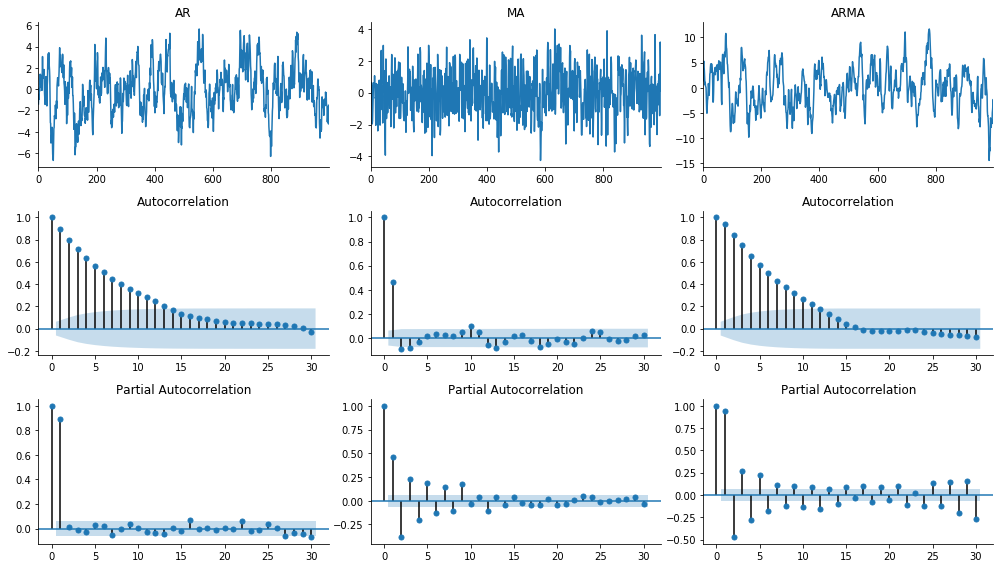

In [14]:
# AR(1) parameter = -0.9
AR_series = generate_ARMA_data([1,-0.9], [1])

# MA(1) parameter = +0.9
MA_series = generate_ARMA_data([1], [1,0.9])

# Plot 3: ARMA(1,1) parameter = 0.9, 0.9
ARMA_series = generate_ARMA_data( [1,-0.9], [1,0.9] )

tsplot_acf_pacf(x = AR_series, y = MA_series, z = ARMA_series, layout = (3,3))

* To specify $p$ and $q$ for AR and MA models respectively, one can use the following table as a guide.

|  Process      |          ACF         |          PACF        |
|---------------|:--------------------:|:--------------------:|
| **AR(p)**     |    tails off         | cutoff after lag $p$ |
| **MA(q)**     | cutoff after lag $q$ |    tails off         |
| **ARMA(p,q)** |    tails off         |    tails off         |

* Keep in mind that these are theoretical properties. In practice, the estimated sample ACF and PACF can come with large variances, deviating from the underlying theoretical behavior. As such, it is prudent to recognize that these are  but broad characteristics, and it is quite possible that several candidate models are narrowed down and will need to be investigaged further in the later stage of the modeling process.

======================================================================================================================

# Information Criteria for Selecting ARMA$(p,q)$

* The acf and pacf are not informative in determining $p$ and $q$ of an ARMA$(p,q)$ model.

* Instead, we can apply Akaike's Information Criterion(AIC), Bayesian Information Criterion (BIC) and Hannan–Quinn information criterion (HQIC) to determine order of an ARMA model:

$$
\begin{align*}
AIC & = -2 \log( \text{ maximum likelihood }) + 2k, \\
BIC & = -2 \log(\text{ maximum likelihood }) + k \log(n) \quad\text{and}\\
HQIC & = -2 \log(\text{ maximum likelihood }) + 2k \ln(\ln(n))
\end{align*}
$$

where $k$ is the number of parameters to be estimated and $n$ is the number of observations.

For example, we have $k = p + q + 1$ if the model contains an intercept and $k = p + q$ otherwise on ARMA$(p,q).$

* Smaller AIC, BIC or HQIC is better.

* If the true process follows an ARMA$(p,q)$ model, then it is known that the orders specified by minimizing BIC leads to the true orders as the sample size increases.

* However, if the true process is not a finite-order ARMA process, then minimizing AIC among an increasingly large class of ARIMA models enjoys the appealing property that it will lead to an optimal ARMA model that is closes to the true process among the class of models under study.

* HQIC, like BIC, but unlike AIC, is not asymptotically efficient.

* It is important to keep in mind that the HQIC can be used to compare estimated models only when the numerical values of the dependent variable are identical for all estimates being compared.

In [15]:
# ARMA_results is a dictionary
ARMA_results = sm.tsa.arma_order_select_ic(ARMA_series, ic=['aic', 'bic', 'hqic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', ARMA_results.aic_min_order)
print('BIC', ARMA_results.bic_min_order)
print('HQIC', ARMA_results.hqic_min_order)
print('Correct answer is (1,1)')

AIC (1, 1)
BIC (1, 1)
HQIC (1, 1)
Correct answer is (1,1)


======================================================================================================================

# Model Fitting

* In sections above, we studied ACF and PACF of AR, MA and ARMA models. 
In this section, we will fit them to a data set for forecasting.

In [16]:
temp_df = pd.read_csv('daily-minimum-temperatures.csv', header=0)
print(temp_df.head())

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


In [17]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


(<matplotlib.axes._subplots.AxesSubplot at 0x12008f160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fd61be0>)

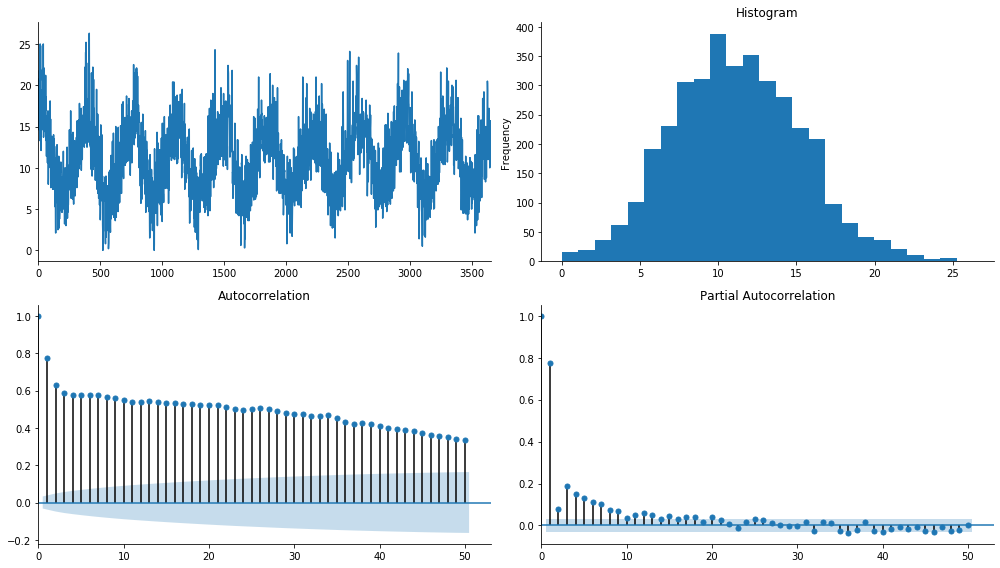

In [18]:
tsplot_acf_pacf(temp_df['Temp'], lags = 50)

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 3642
Model:                     ARMA(3, 1)   Log Likelihood               -8366.484
Method:                       css-mle   S.D. of innovations              2.406
Date:                Thu, 29 Aug 2019   AIC                          16744.967
Time:                        20:39:39   BIC                          16782.169
Sample:                             0   HQIC                         16758.217
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4328      0.833     13.730      0.000       9.801      13.065
ar.L1.Temp     1.4852      0.019     78.550      0.000       1.448       1.522
ar.L2.Temp    -0.6209      0.028    -22.263      0.0

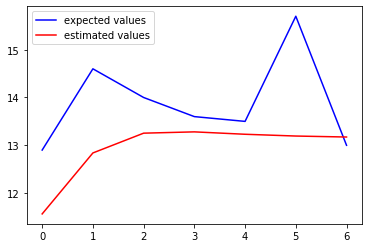

In [19]:
# split dataset
X = temp_df['Temp']
train, test1 = X[1:len(X)-7], X[len(X)-7:]
test = test1.rename(lambda x: x - 3643)

# train autoregression
model = ARIMA(train, order = (3,0,1))   
model_fit = model.fit()
print(model_fit.summary())

# make predictions
predictions1 = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions1.rename(lambda x: x- 3643)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]) )
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
plt.plot(test, color = 'blue', label = 'expected values')
plt.plot(predictions, color='red', label = 'estimated values')
plt.legend(loc = 'upper left')
plt.show()

* css-mle = Conditional Sum of Squares - Maximum Likelihood Estimator

In [20]:
# A model selection method, limited to only searching AR and MA parameters

train_results = sm.tsa.arma_order_select_ic(X, ic=['aic', 'bic', 'hqic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)
print('HQIC', train_results.hqic_min_order)

AIC (3, 1)
BIC (3, 1)
HQIC (3, 1)
